In [1]:
# 라이브러리
import pandas as pd
import matplotlib.pyplot as plt
import platform
import matplotlib.font_manager as fm
import tkinter
import seaborn as sns
import datetime

# 한글 출력 오류
system_name = platform.system()
if system_name == 'Windows':
    # Windows 운영체제
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':
    # Mac OS
    plt.rc('font', family='AppleGothic')
elif system_name == 'Linux':
    # Linux
    path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
    font_name = fm.FontProperties(fname=path, size=12)
    plt.rc('font', family=font_name)
else:
    print("Not support")

# 1. 데이터 가져오기 (유튜브 뷰, 트위터 키워드, 나라별 유튜브 뷰, 미국의 K-POP 음원 순위 순)
org_df = pd.read_csv('data/KC_YOUTUBE_VIEW_US_2019.csv')
df = org_df.drop(['FILE_NAME','BASE_YMD'], axis=1)

keyword = pd.read_csv('data\KC_KEYWORD_TWITTER_ARTIST_2019.csv')
keyword = keyword.drop(['Collection_CH_NM', 'FILE_NAME', 'BASE_YMD', 'Twitter_KEY_W'], axis = 1 )

dfus = pd.read_csv("data/KC_music_chart_us_2019.csv", encoding='utf-8')
dfus['Survey_Base_Date_DE']= pd.to_datetime(dfus['Survey_Base_Date_DE'], format = '%Y-%m-%d')   #datetime으로 변환

# 미국
usview = pd.read_csv('data/KC_YOUTUBE_VIEW_US_2019.csv', sep = ',',encoding = 'utf-8')
us = usview.loc[:,['Survey_Date_DE','Country_CD','Artist_NM','Views_CO']]
# 베트남
vnview = pd.read_csv('data/KC_YOUTUBE_VIEW_VN_2019.csv', sep = ',',encoding = 'utf-8')
vn = vnview.loc[:,['Survey_Date_DE','Country_CD','Artist_NM','Views_CO']]
# 호주
auview = pd.read_csv('data/KC_YOUTUBE_VIEW_AU_2019.csv', sep = ',', encoding = 'utf-8')
au = auview.loc[:,['Survey_Date_DE','Country_CD','Artist_NM','Views_CO']]
# 영국
gbview = pd.read_csv('data/KC_YOUTUBE_VIEW_GB_2019.csv', sep = ',', encoding = 'utf-8')
gb = gbview.loc[:,['Survey_Date_DE','Country_CD','Artist_NM','Views_CO']]
# 인도네시아
idview = pd.read_csv('data/KC_YOUTUBE_VIEW_ID_2019.csv', sep = ',',encoding = 'utf-8')
id = idview.loc[:,['Survey_Date_DE','Country_CD','Artist_NM','Views_CO']]

In [2]:
# 2. 자료형 변환
df['Survey_Date_DE'] = pd.to_datetime(df['Survey_Date_DE'], format='%Y-%m-%d')

keyword['Social_Data_Collection_Date_YM'] = pd.to_datetime(keyword['Social_Data_Collection_Date_YM'], format = '%Y-%d')
# ['Social_Data_Collection_Date_YM'] 컬럼 연도별로 나누기 2017년 2018년 2019년
keyword1 = keyword.loc[keyword['Social_Data_Collection_Date_YM'].dt.year == 2017]
keyword2 = keyword.loc[keyword['Social_Data_Collection_Date_YM'].dt.year == 2018]
keyword3 = keyword.loc[keyword['Social_Data_Collection_Date_YM'].dt.year == 2019]

views = pd.concat([us, vn, au, gb, id], axis = 0)
print(views)

dfus=dfus.drop(['FILE_NAME','BASE_YMD','Country_CD'], axis=1)

    Survey_Date_DE Country_CD         Artist_NM  Views_CO
0       2019-12-16         us        BTS(방탄소년단)   1059194
1       2019-12-16         us         Blackpink    399085
2       2019-12-16         us       TWICE(트와이스)    311839
3       2019-12-16         us           EXO(엑소)    234232
4       2019-12-16         us     MAMAMOO (마마무)    194163
..             ...        ...               ...       ...
527     2020-01-12         id             몬스타엑스     23115
528     2020-01-12         id               NCT     12899
529     2020-01-12         id               CLC     11622
530     2020-01-12         id  오마이걸(OH MY GIRL)      7057
531     2020-01-12         id         Blackpink      4713

[2660 rows x 4 columns]


### 아티스트별 28일간 일일 뮤비 조회수 증감

Text(0.5, 1.0, '오마이걸(OH MY GIRL)')

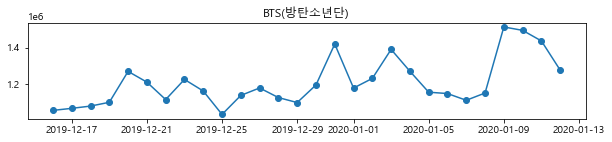

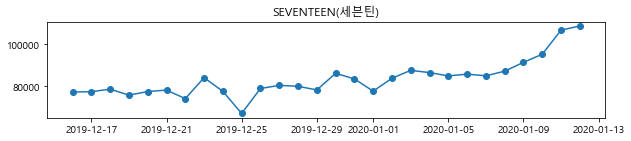

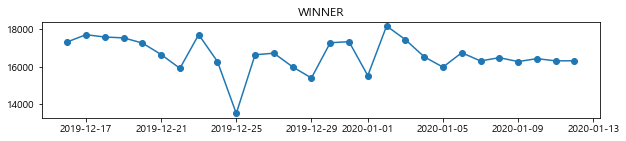

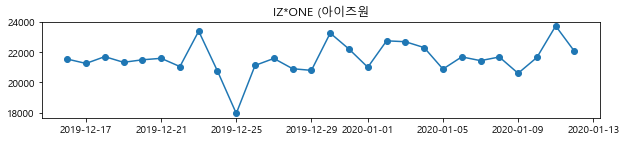

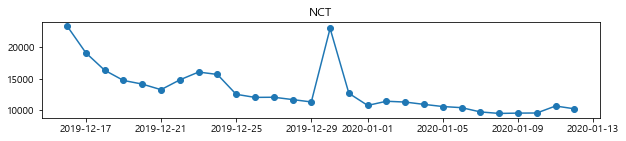

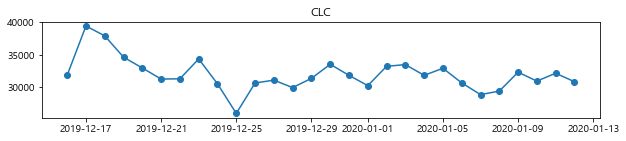

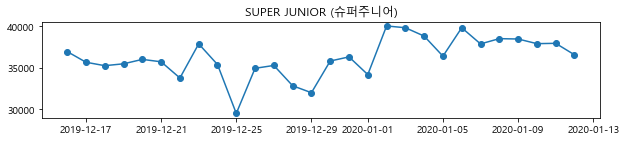

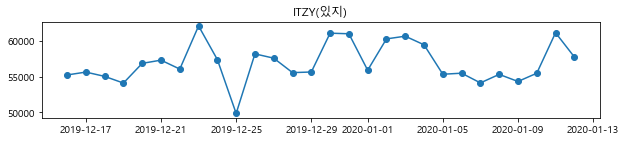

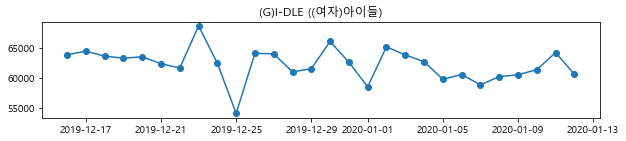

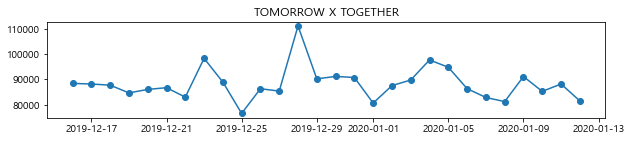

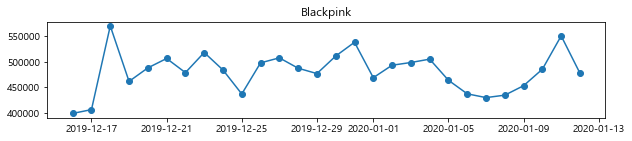

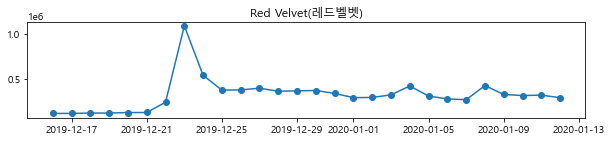

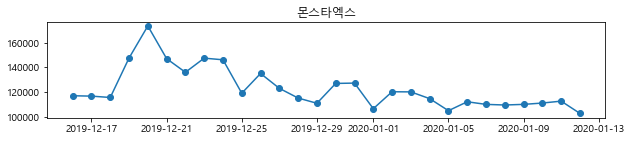

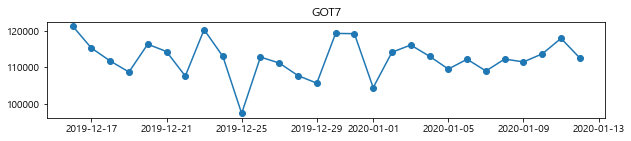

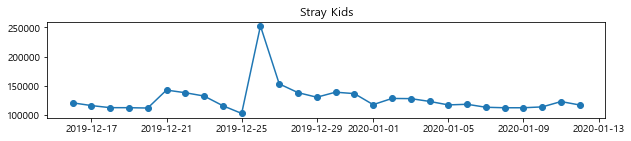

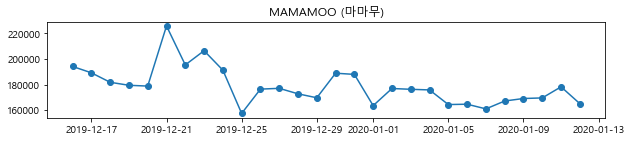

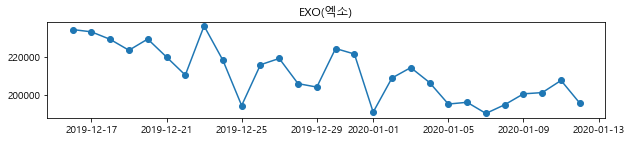

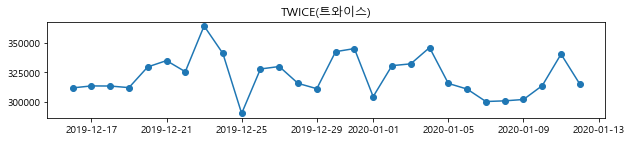

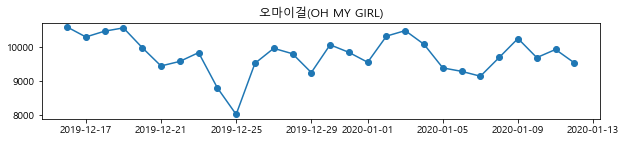

In [3]:
# 19 아티스트 리스트 만들기
artists = list(df['Artist_NM'].value_counts().index)
#print(artists)

# BTS
artist_df = df[df['Artist_NM'] == 'BTS(방탄소년단)']
days_df = artist_df['Survey_Date_DE']
views_df = artist_df['Views_CO']
plt.figure(figsize=(10,40))
plt.subplot(19,1,1)
plt.plot(days_df, views_df, marker='o')
plt.title('BTS(방탄소년단)')

# SEVENTEEN
artist_df = df[df['Artist_NM'] == 'SEVENTEEN(세븐틴)']
days_df = artist_df['Survey_Date_DE']
views_df = artist_df['Views_CO']
plt.figure(figsize=(10,40))
plt.subplot(19,1,2)
plt.plot(days_df, views_df, marker='o')
plt.title('SEVENTEEN(세븐틴)')

# WINNER
artist_df = df[df['Artist_NM'] == 'WINNER']
days_df = artist_df['Survey_Date_DE']
views_df = artist_df['Views_CO']
plt.figure(figsize=(10,40))
plt.subplot(19,1,3)
plt.plot(days_df, views_df, marker='o')
plt.title('WINNER')

# IZ*ONE
artist_df = df[df['Artist_NM'] == 'IZ*ONE (아이즈원)']
days_df = artist_df['Survey_Date_DE']
views_df = artist_df['Views_CO']
plt.figure(figsize=(10,40))
plt.subplot(19,1,4)
plt.plot(days_df, views_df, marker='o')
plt.title('IZ*ONE (아이즈원')

# NCT
artist_df = df[df['Artist_NM'] == 'NCT']
days_df = artist_df['Survey_Date_DE']
views_df = artist_df['Views_CO']
plt.figure(figsize=(10,40))
plt.subplot(19,1,5)
plt.plot(days_df, views_df, marker='o')
plt.title('NCT')

# CLC
artist_df = df[df['Artist_NM'] == 'CLC']
days_df = artist_df['Survey_Date_DE']
views_df = artist_df['Views_CO']
plt.figure(figsize=(10,40))
plt.subplot(19,1,6)
plt.plot(days_df, views_df, marker='o')
plt.title('CLC')

# SUPER JUNIOR
artist_df = df[df['Artist_NM'] == 'SUPER JUNIOR(슈퍼주니어)']
days_df = artist_df['Survey_Date_DE']
views_df = artist_df['Views_CO']
plt.figure(figsize=(10,40))
plt.subplot(19,1,7)
plt.plot(days_df, views_df, marker='o')
plt.title('SUPER JUNIOR (슈퍼주니어)')

# ITZY
artist_df = df[df['Artist_NM'] == 'ITZY(있지)']
days_df = artist_df['Survey_Date_DE']
views_df = artist_df['Views_CO']
plt.figure(figsize=(10,40))
plt.subplot(19,1,8)
plt.plot(days_df, views_df, marker='o')
plt.title('ITZY(있지)')

# (G)I-DLE
artist_df = df[df['Artist_NM'] == '(G)I-DLE ((여자)아이들)']
days_df = artist_df['Survey_Date_DE']
views_df = artist_df['Views_CO']
plt.figure(figsize=(10,40))
plt.subplot(19,1,9)
plt.plot(days_df, views_df, marker='o')
plt.title('(G)I-DLE ((여자)아이들)')

# TOMORROW X TOGETHER
artist_df = df[df['Artist_NM'] == 'TOMORROW X TOGETHER']
days_df = artist_df['Survey_Date_DE']
views_df = artist_df['Views_CO']
plt.figure(figsize=(10,40))
plt.subplot(19,1,10)
plt.plot(days_df, views_df, marker='o')
plt.title('TOMORROW X TOGETHER')

# Blackpink
artist_df = df[df['Artist_NM'] == 'Blackpink']
days_df = artist_df['Survey_Date_DE']
views_df = artist_df['Views_CO']
plt.figure(figsize=(10,40))
plt.subplot(19,1,11)
plt.plot(days_df, views_df, marker='o')
plt.title('Blackpink')

# Red Velvet(레드벨벳)
artist_df = df[df['Artist_NM'] == 'Red Velvet(레드벨벳)']
days_df = artist_df['Survey_Date_DE']
views_df = artist_df['Views_CO']
plt.figure(figsize=(10,40))
plt.subplot(19,1,12)
plt.plot(days_df, views_df, marker='o')
plt.title('Red Velvet(레드벨벳)')

# 몬스타엑스
artist_df = df[df['Artist_NM'] == '몬스타엑스']
days_df = artist_df['Survey_Date_DE']
views_df = artist_df['Views_CO']
plt.figure(figsize=(10,40))
plt.subplot(19,1,13)
plt.plot(days_df, views_df, marker='o')
plt.title('몬스타엑스')

# GOT7
artist_df = df[df['Artist_NM'] == 'GOT7']
days_df = artist_df['Survey_Date_DE']
views_df = artist_df['Views_CO']
plt.figure(figsize=(10,40))
plt.subplot(19,1,14)
plt.plot(days_df, views_df, marker='o')
plt.title('GOT7')

# Stray Kids
artist_df = df[df['Artist_NM'] == 'Stray Kids']
days_df = artist_df['Survey_Date_DE']
views_df = artist_df['Views_CO']
plt.figure(figsize=(10,40))
plt.subplot(19,1,15)
plt.plot(days_df, views_df, marker='o')
plt.title('Stray Kids')

# MAMAMOO
artist_df = df[df['Artist_NM'] == 'MAMAMOO (마마무)']
days_df = artist_df['Survey_Date_DE']
views_df = artist_df['Views_CO']
plt.figure(figsize=(10,40))
plt.subplot(19,1,16)
plt.plot(days_df, views_df, marker='o')
plt.title('MAMAMOO (마마무)')

# EXO
artist_df = df[df['Artist_NM'] == 'EXO(엑소)']
days_df = artist_df['Survey_Date_DE']
views_df = artist_df['Views_CO']
plt.figure(figsize=(10,40))
plt.subplot(19,1,17)
plt.plot(days_df, views_df, marker='o')
plt.title('EXO(엑소)')

# TWICE
artist_df = df[df['Artist_NM'] == 'TWICE(트와이스)']
days_df = artist_df['Survey_Date_DE']
views_df = artist_df['Views_CO']
plt.figure(figsize=(10,40))
plt.subplot(19,1,18)
plt.plot(days_df, views_df, marker='o')
plt.title('TWICE(트와이스)')

# 오마이걸
artist_df = df[df['Artist_NM'] == '오마이걸(OH MY GIRL)']
days_df = artist_df['Survey_Date_DE']
views_df = artist_df['Views_CO']
plt.figure(figsize=(10,40))
plt.subplot(19,1,19)
plt.plot(days_df, views_df, marker='o')
plt.title('오마이걸(OH MY GIRL)')

### 아티스트별 28일간 누적 뮤비 조회수

Text(0.5, 1.0, '아티스트별 28일 누적 뮤비 조회수')

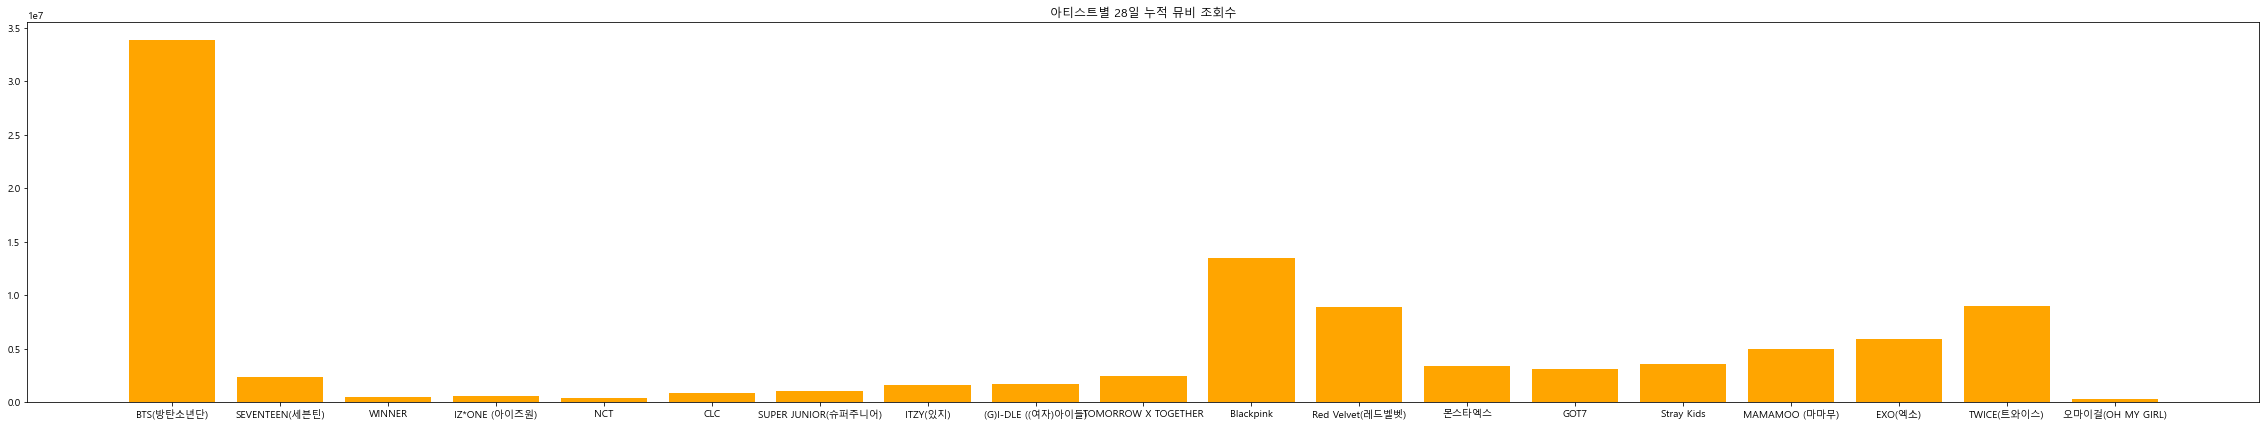

In [4]:
acc_views2 = []

for i in range(0,19):
    artists_df2 = df[df['Artist_NM'] ==  artists[i]]
    acc_views2.append(artists_df2['Views_CO'].sum())

plt.figure(figsize=(40,7))
plt.bar(artists, acc_views2,color='orange')
plt.title('아티스트별 28일 누적 뮤비 조회수')

### 아티스트별 키워드 빈도수 (2017~2019)

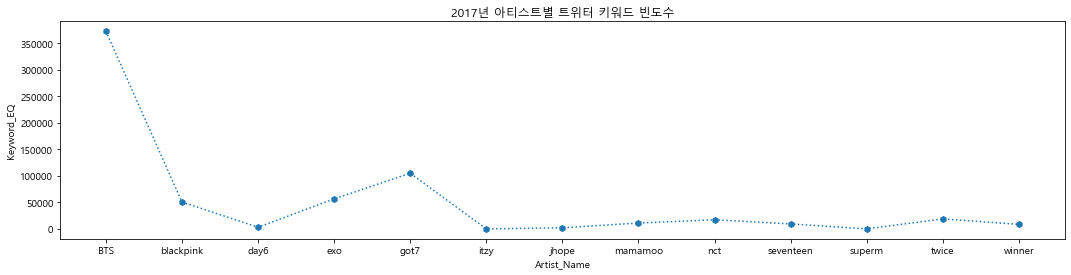

None


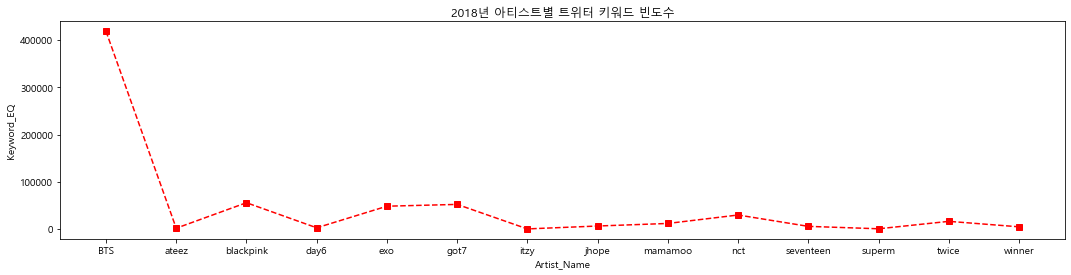

None


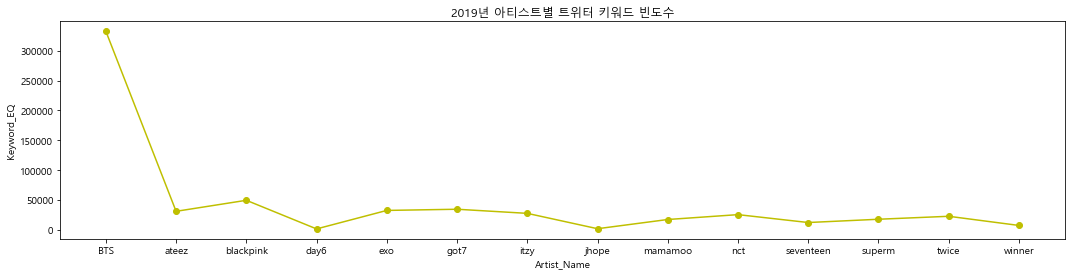

None


In [5]:
# ['Social_Data_Collection_Date_YM'] 컬럼 연도별로 나누기 2017년 2018년 2019년
keyword1 = keyword.loc[keyword['Social_Data_Collection_Date_YM'].dt.year == 2017]
keyword2 = keyword.loc[keyword['Social_Data_Collection_Date_YM'].dt.year == 2018]
keyword3 = keyword.loc[keyword['Social_Data_Collection_Date_YM'].dt.year == 2019]

# 2017년 아티스트별 키워드 빈도수 합치기
artist_keyword_17 = keyword1.groupby('Artist_NM').sum()
artist_list_17 = list(artist_keyword_17.index)
keyword_list_17 = list(artist_keyword_17['Keyword_FQ'].values)

# 2018년 아티스트별 키워드 빈도수 합치기
artist_keyword_18 = keyword2.groupby('Artist_NM').sum()
artist_list_18 = list(artist_keyword_18.index)
keyword_list_18 = list(artist_keyword_18['Keyword_FQ'].values)

# 2019년 아티스트별 키워드 빈도수 합치기
artist_keyword_19 = keyword3.groupby('Artist_NM').sum()
artist_list_19 = list(artist_keyword_19.index)
keyword_list_19 = list(artist_keyword_19['Keyword_FQ'].values)

plt.figure(figsize=(18, 4))
plt.plot(artist_list_17, keyword_list_17,
marker = 'h', linestyle = ':')
plt.title('2017년 아티스트별 트위터 키워드 빈도수')
plt.xlabel('Artist_Name')
plt.ylabel('Keyword_EQ')
print(plt.show())

plt.figure(figsize=(18, 4))    
plt.plot(artist_list_18, keyword_list_18,
marker = 's', linestyle = '--', color = 'r' )
plt.title('2018년 아티스트별 트위터 키워드 빈도수')
plt.xlabel('Artist_Name')
plt.ylabel('Keyword_EQ')
print(plt.show())

plt.figure(figsize=(18, 4))
plt.plot(artist_list_19, keyword_list_19,
marker = 'o', linestyle = '-', color = 'y' )
plt.title('2019년 아티스트별 트위터 키워드 빈도수')
plt.xlabel('Artist_Name')
plt.ylabel('Keyword_EQ')
print(plt.show())

### 나라별 각 아티스트들의 유튜브 조회수 (2019.12)

각 나라별 누적 조회수는
[98178803, 7817229, 15223463, 112790192, 53649934]
<class 'list'>
[[98178803], [7817229], [15223463], [112790192], [53649934]]
<class 'list'>
['ACC_VIEW']


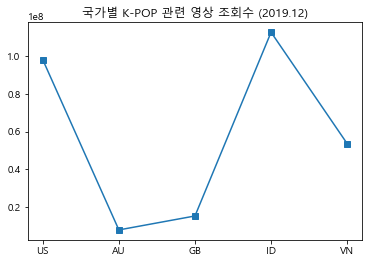

<Figure size 2160x1080 with 0 Axes>

In [6]:
#나라별 누적 조회수
us_sum = us['Views_CO'].sum()
au_sum = au['Views_CO'].sum()
gb_sum = gb['Views_CO'].sum()
id_sum = id['Views_CO'].sum()
vn_sum = vn['Views_CO'].sum()
total_cd = [us_sum, au_sum,gb_sum, id_sum, vn_sum]
print("각 나라별 누적 조회수는")
print(total_cd)

# 데이터프레임화
view = pd.DataFrame({
    'Country' : ['US', 'AU', 'GB', 'ID', 'VN'],
    'ACC_VIEW' : total_cd},
    index = ['US', 'AU', 'GB', 'ID', 'VN'],
    columns = ['ACC_VIEW'])

# 그래프
val_list = view.values.tolist()
print(type(val_list))
print(val_list)

ctr_list = view.columns.tolist()
print(type(ctr_list))
print(ctr_list)

COLOR_GOLD = "#FFD700"
SQUARE_MARKER = 's'
plt.title('국가별 K-POP 관련 영상 조회수 (2019.12)')
plt.plot(view.index, view['ACC_VIEW'], marker = SQUARE_MARKER, linestyle = '-')
plt.figure(figsize = (30,15))
plt.show()

### 나라별 아티스트의 28일 누적 뮤비 조회수

Text(0.5, 1.0, '국가별 아티스트 28일 누적 뮤비 조회수')

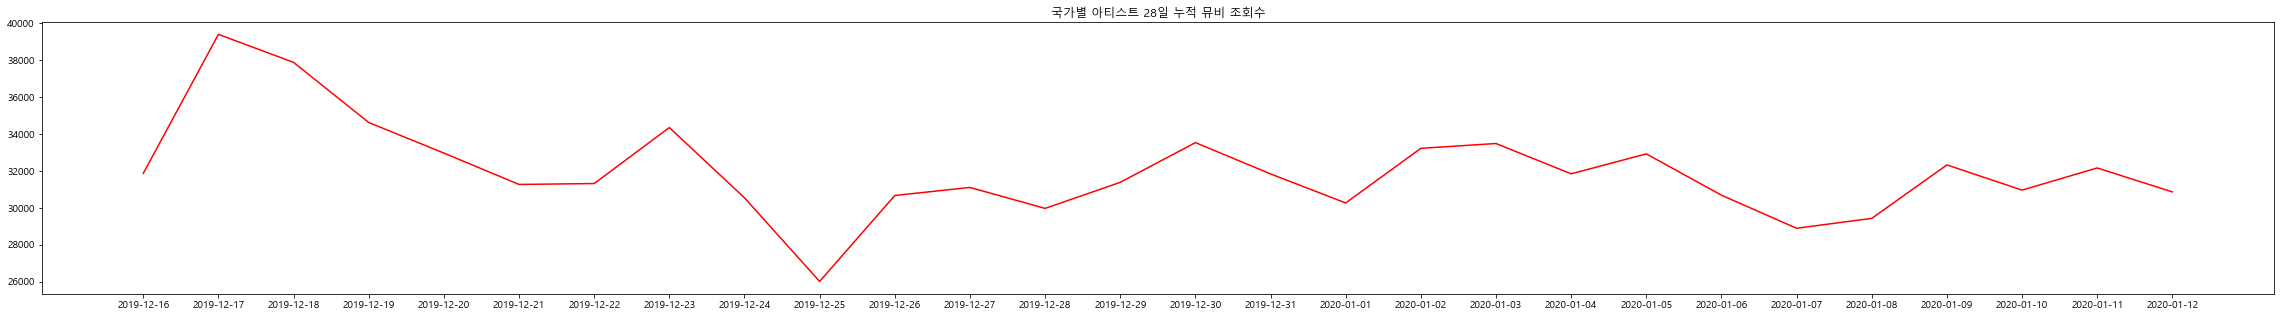

In [8]:
#조회할 국가 입력
select = input("조회할 국가를 입력하세요 : ")
select_ctr = views[views['Country_CD'] == select]

# 국가 > 아티스트 입력
select2 = input("아티스트를 입력하세요 : ")
select_art = select_ctr[select_ctr['Artist_NM'] == select2]

#그래프
plt.figure(figsize=(40,5))
plt.plot(select_art['Survey_Date_DE'], select_art['Views_CO'],color='red' , )
plt.title('국가별 아티스트 28일 누적 뮤비 조회수')


### 미국의 K-POP 음원 순위

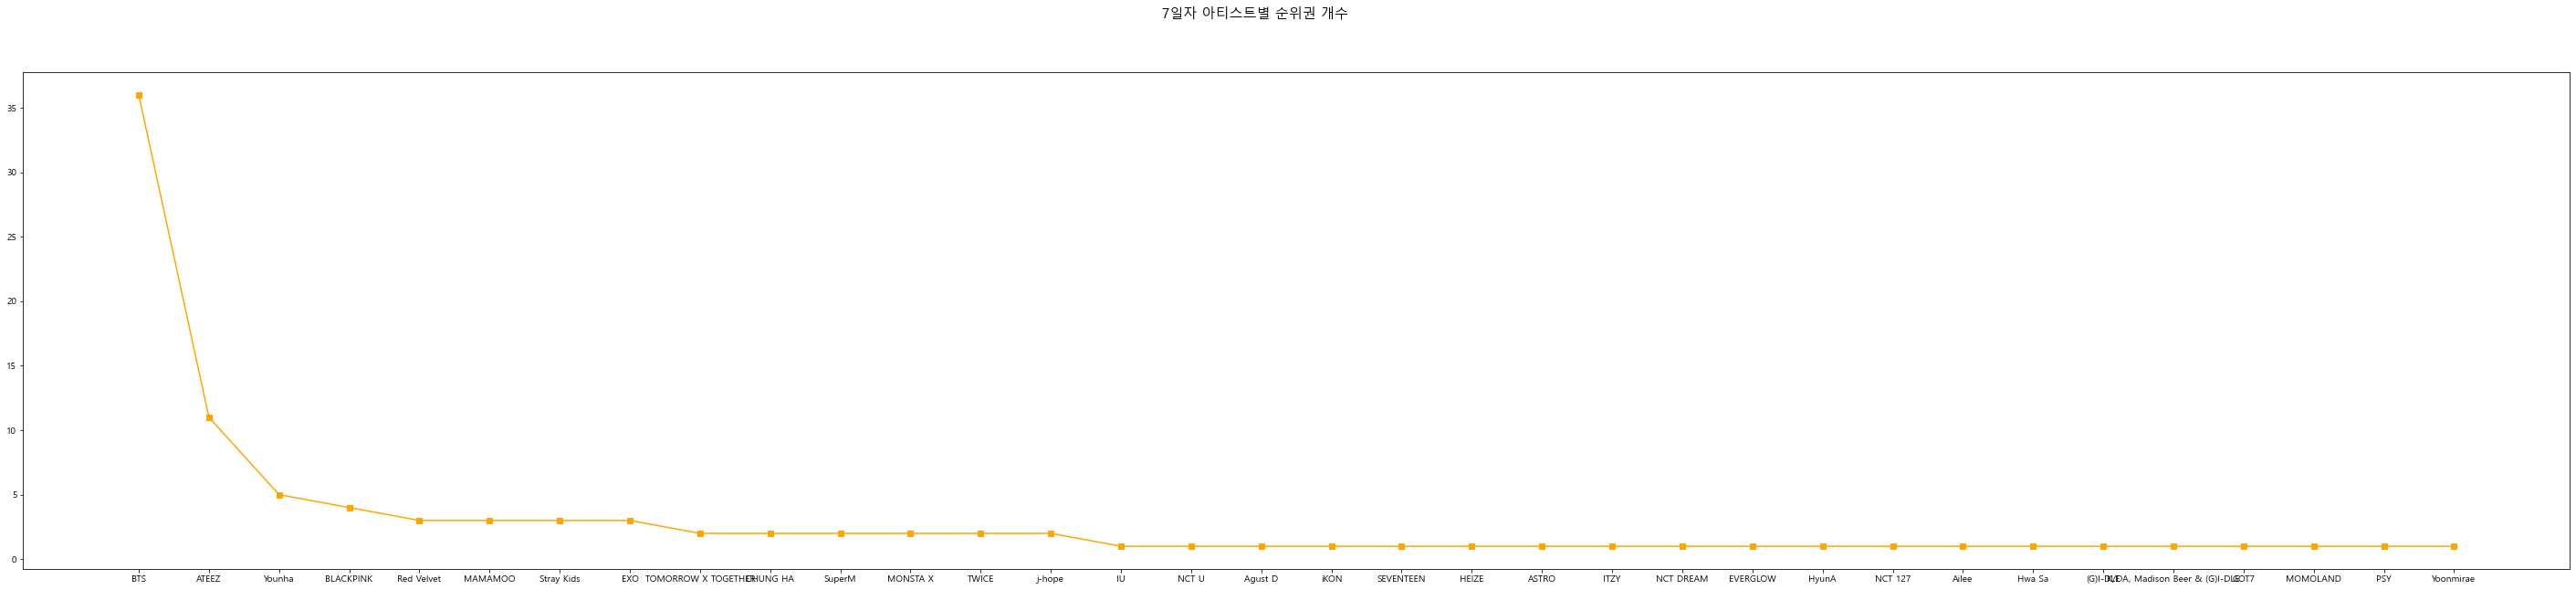

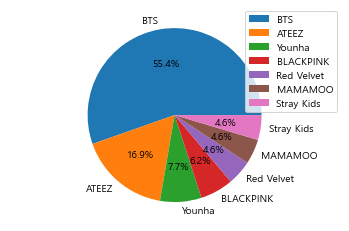

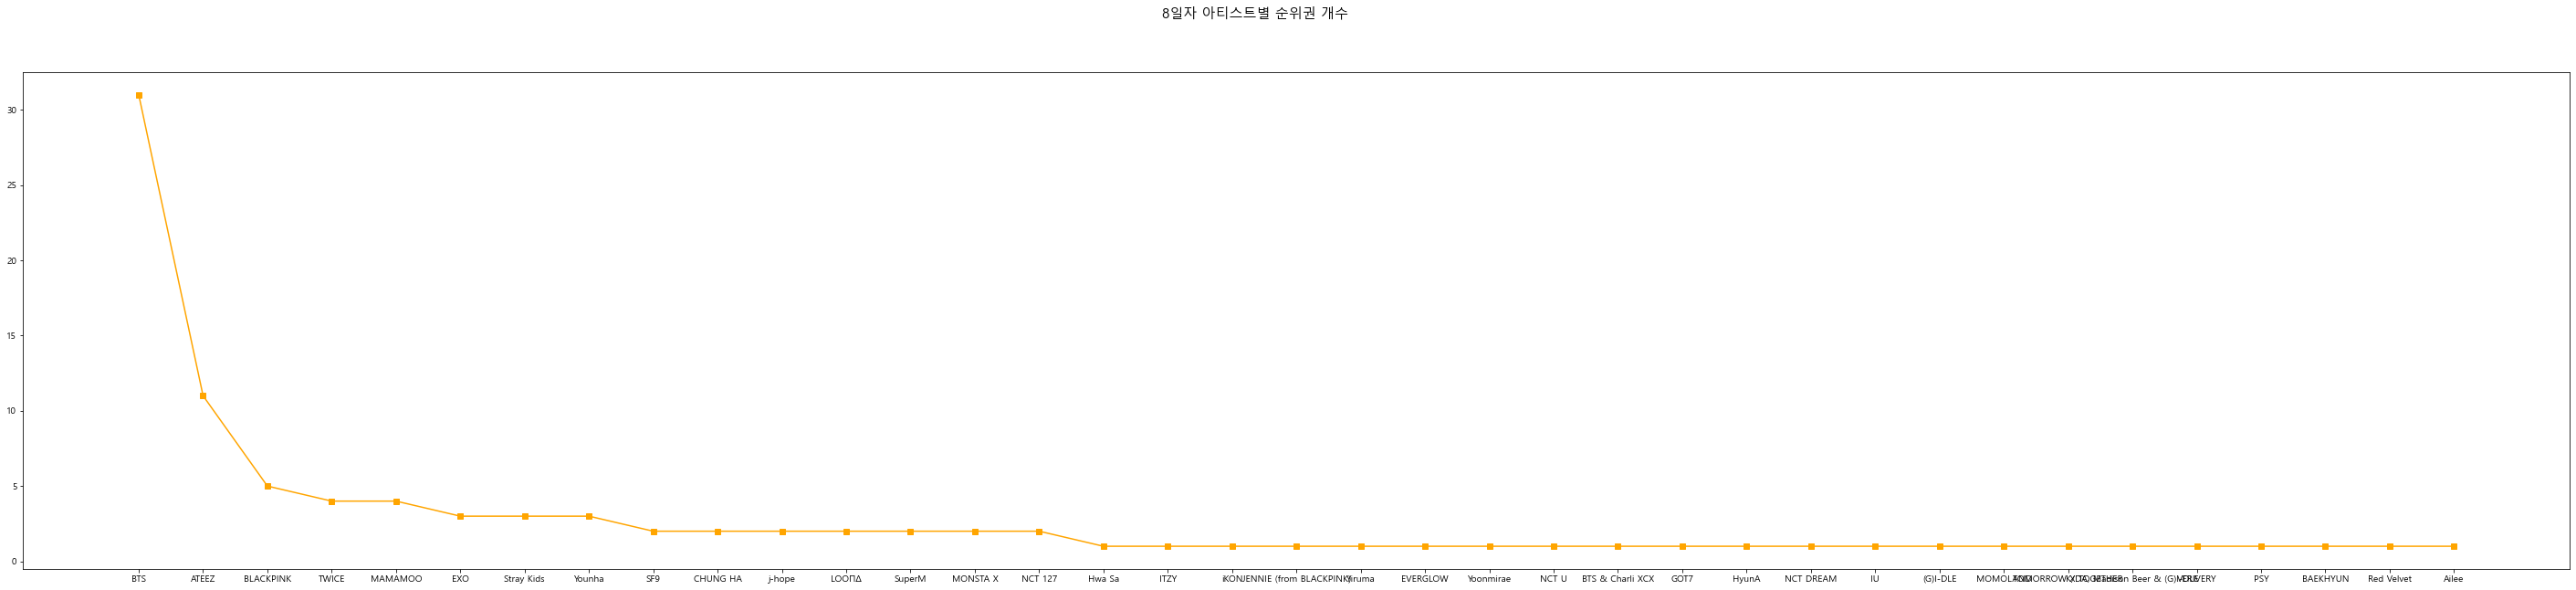

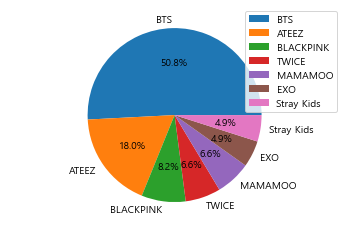

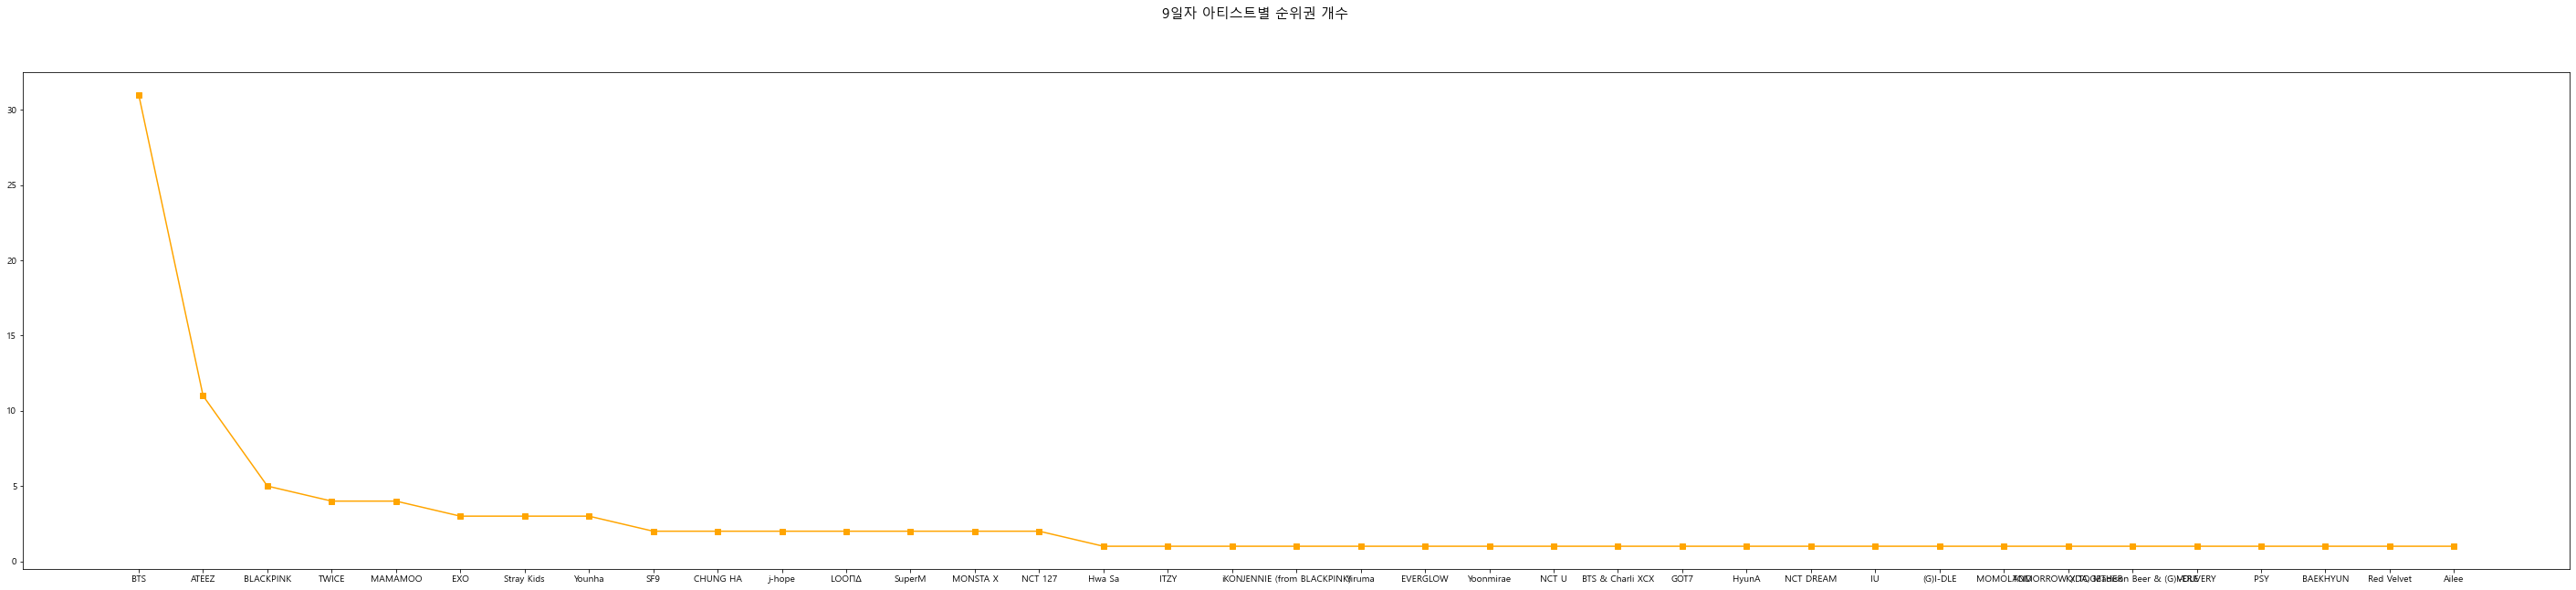

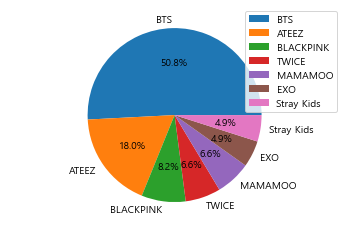

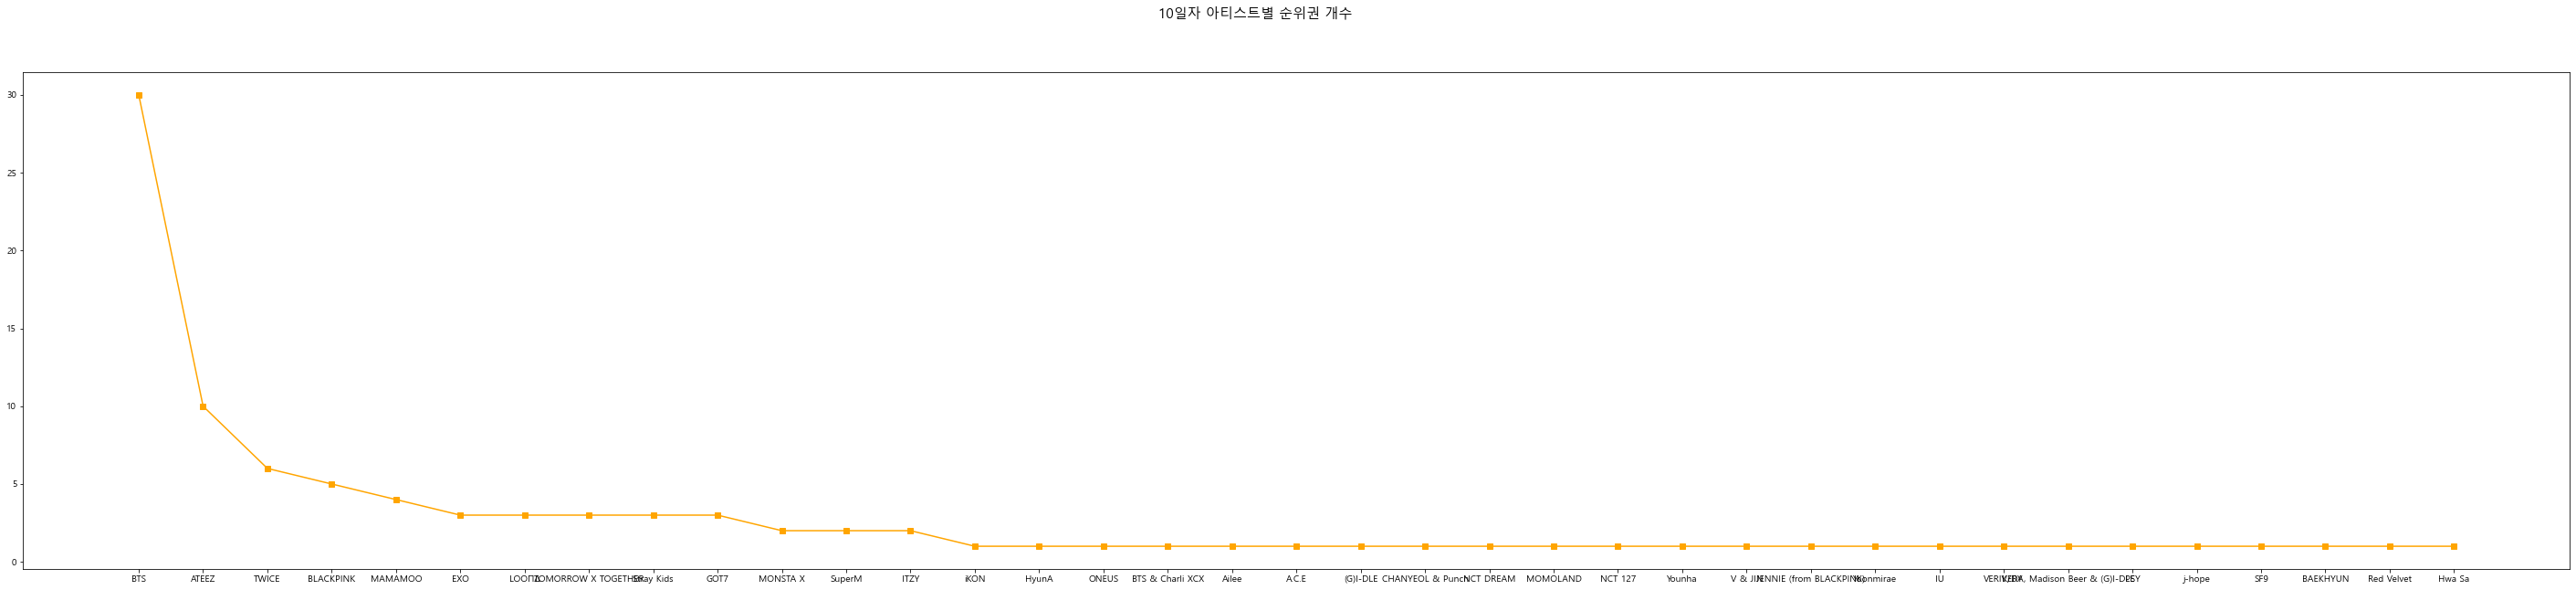

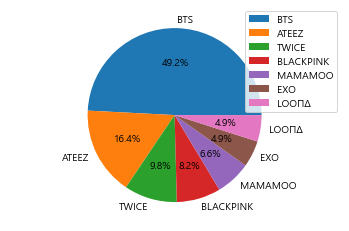

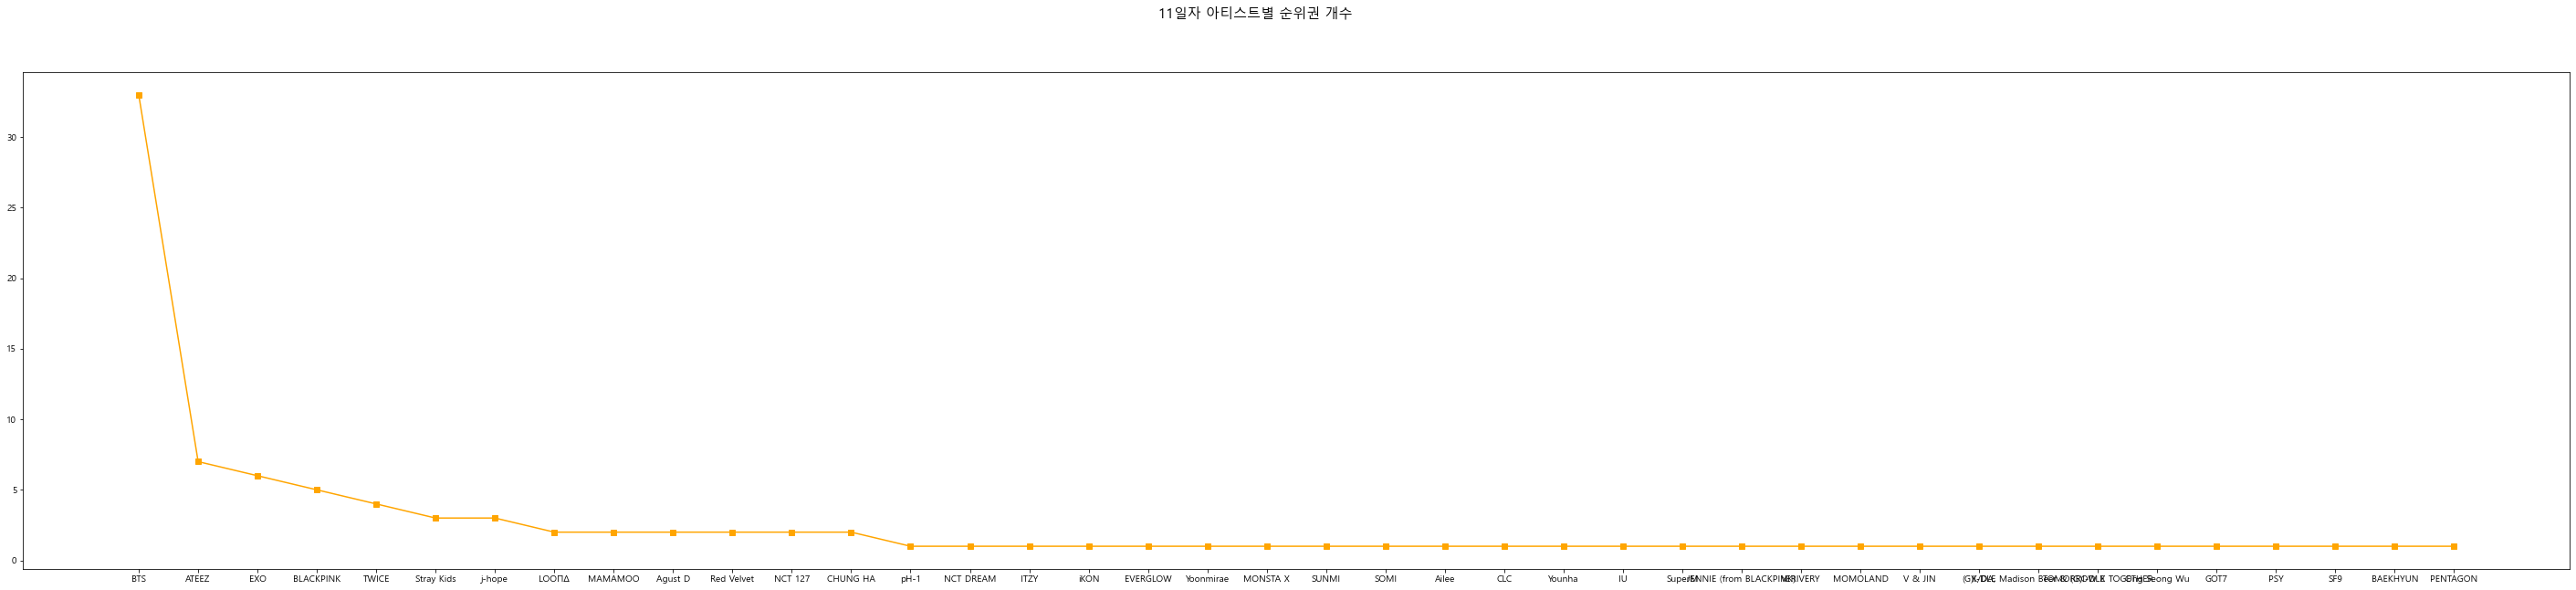

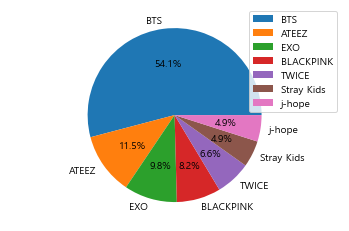

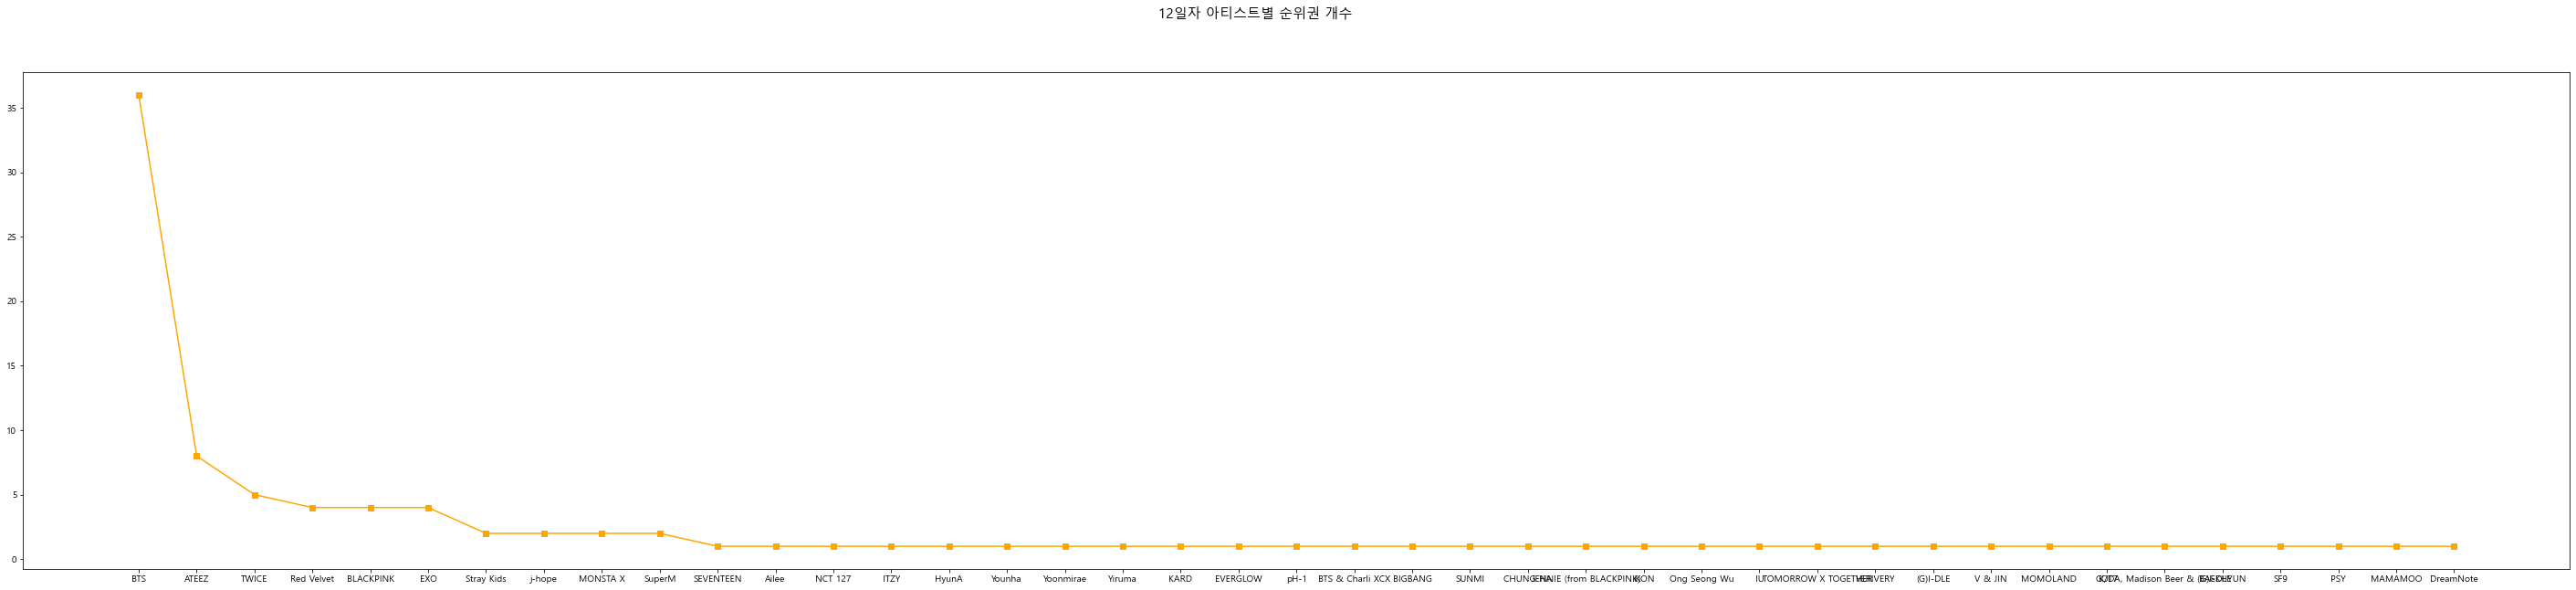

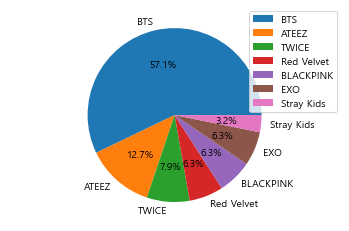

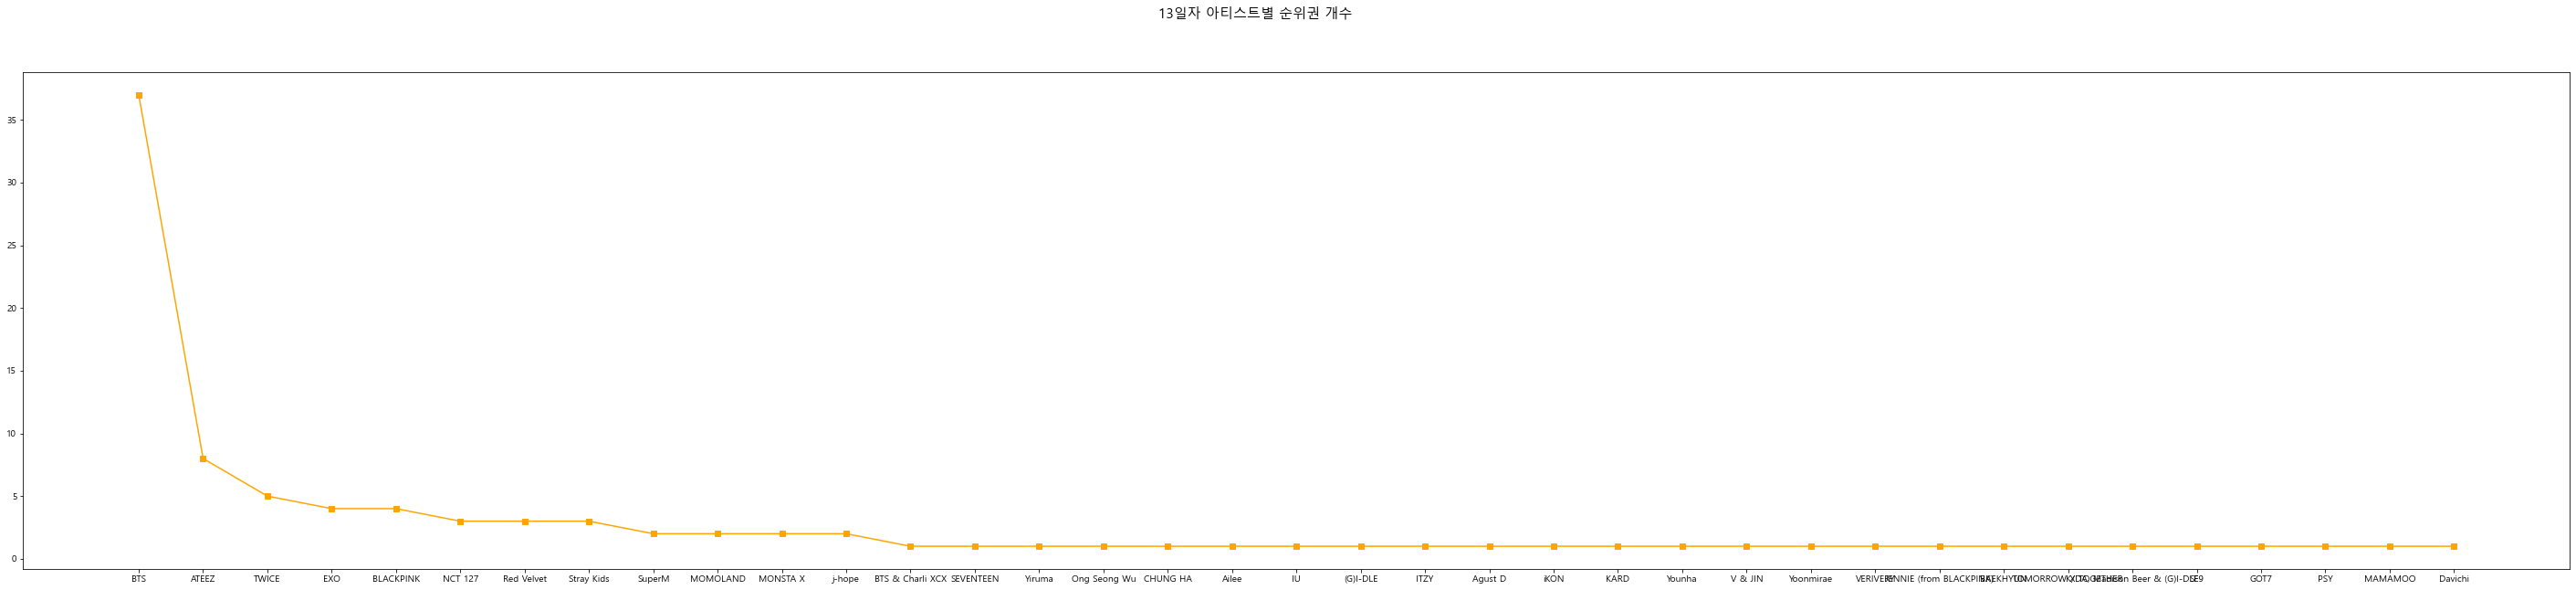

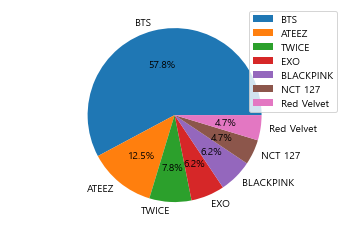

7일에 해당하는 BTS아티스트의 순위권 개수는 36입니다.
8일에 해당하는 BTS아티스트의 순위권 개수는 31입니다.
9일에 해당하는 BTS아티스트의 순위권 개수는 31입니다.
10일에 해당하는 BTS아티스트의 순위권 개수는 30입니다.
11일에 해당하는 BTS아티스트의 순위권 개수는 33입니다.
12일에 해당하는 BTS아티스트의 순위권 개수는 36입니다.
13일에 해당하는 BTS아티스트의 순위권 개수는 37입니다.


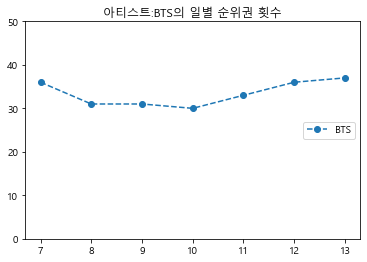

In [9]:
import tkinter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import platform

%matplotlib inline
system_name = platform.system()
if system_name == 'Windows':
# Windows 운영체제
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':
# Mac OS
    plt.rc('font', family='AppleGothic')
elif system_name == 'Linux':
    path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
    font_name = fm.FontProperties(fname=path, size=12)
    plt.rc('font', family=font_name)
else:
    print("Not support")
class us_pop:                        # 미국내 pop영향 분석을 위한 클래스 선언
 #   day_artist_index=[]               # day별 아티스트들 리스트
 #   day_artist_value=[]               # day별 아티스트들 순위권 개수
 #   get_value=[]           
 #   total1=[]                         #한달 토탈  아티스트들 아직 구현 X
 #   total2=[]                         #한달 토탈 아티스트별 순위권 개수  아직 구현 X
#    day_length = []                   #입력된 날짜의 값들을 가짐.
#    artist_name = 0                    #아티스트 이름 str
#    start_day =0                       # input으로 입력받을 start_day
  #  end_day = 0                        # input으로 입력받을 end_Day
    def __init__(self):                  #생성자 자동 호출됨.
        self.SQUARE_MARKER = 's'                # 생성자가 자동 호출되면서 파일을 읽고 불필요한 컬럼을 자르고, yeardate형 데이터를 ....
        self.dfus = pd.read_csv("data/KC_music_chart_us_2019.csv", encoding='utf-8')
        self.dfus['Survey_Base_Date_DE'] = pd.to_datetime(self.dfus['Survey_Base_Date_DE'], format='%Y-%m-%d')
        self.dfus=self.dfus.drop(['FILE_NAME','BASE_YMD','Country_CD'], axis=1)
        self.artist_name = 0
        self.start_day =0
        self.end_day=0
        self.day_length =[]
        self.get_value=[] 
        self.day_artist_index=[] 
        self.day_artist_value=[]
        self.total1=[]
        self.total2=[]
        self.set_data()
    def set_data(self):                       # 시작날짜와 종료날짜를 입력받고 Day별 아티스트들의 순위권 개수를 보여줌.
        self.start_day = int(input("검색을 시작할 날짜를 입력해 주세요.(7일)"))
        self.end_day = int(input("검색을 종료할 날짜를 입력해 주세요.(28일)"))
        for i in range(self.start_day, self.end_day+1): #날짜 길이에 따라 day값 저장
            self.day_length += [i]
        self.total1= list(self.dfus['Music_NM'].value_counts().index) #1달 전체의 아티스트 이름
        self.total2 = list(self.dfus['Music_NM'].value_counts().values) #1달 전체의 아티스트별 개수들
        for i in range(0, (self.end_day-self.start_day+1)):            # 입력된 날짜 만큼 아티스트 인덱스와 값들을 받고, plot과 pie로 해당 데이터 그림
            self.day_artist_index =list(self.dfus[self.dfus['Survey_Base_Date_DE'].dt.day == self.start_day+i]['Music_NM'].value_counts().index)  
            self.day_artist_value= list(self.dfus[self.dfus['Survey_Base_Date_DE'].dt.day == self.start_day+i]['Music_NM'].value_counts().values)
            fig, axes = plt.subplots(1, 1, figsize=(50, 10), sharex=True, sharey=True)
            fig.suptitle('{0}일자 아티스트별 순위권 개수'.format((self.start_day+i), ), fontsize=15)
            plt.plot(self.day_artist_index, self.day_artist_value, color='ORANGE', marker=SQUARE_MARKER, linestyle = '-',markersize = 6)
            plt.show()
            plt.savefig("test{0}.png".format(i))
            plt.axis('equal')
            plt.pie(self.day_artist_value[:7], labels=self.day_artist_index[:7], autopct='%.1f%%')
            plt.legend()
            plt.show()
        self.set_artist()  #클래스 내 set_artist() 함수 실행
    def set_artist(self): # set_artist 함수는 아티스트를 입력하여 해당 아티스트를 x=[일자], y=[개수] 별로 보여주기 위함
        self.artist_name = input("원하시는 아티스트의 이름을 입력 해 주세요.")
        test3= self.dfus[self.dfus['Music_NM'] == self.artist_name]  # 데이터프레임에서 입력한 아티스트만 존재하는 데이터 프레임 df를 test3으로 함.
        for i in range(0, (self.end_day - self.start_day+1)): #for문을 이용하여 get_vlaue에 값들을 추가함. 일자별로 해당 아티스트에 개수를 저장
            self.get_value += list(test3[test3['Survey_Base_Date_DE'].dt.day == self.start_day+i]['Music_NM'].value_counts().values)
        for i in range(0, (self.end_day - self.start_day+1)): #for문을 이용하여 각 일자별 해당 데이터 개수를 print함
            print("{0}일에 해당하는 {1}아티스트의 순위권 개수는 {2}입니다.".format(self.day_length[i], self.artist_name, self.get_value[i]))
        self.draw_artist()  # 클래스내 draw_artist() 함수 실행
    def draw_artist(self): # 원하는 아티스트만을 그리는 함수.
        y_axis = [0,10, 20, 30, 40, 50] # y축 tick
        plt.title('아티스트:{0}의 일별 순위권 횟수'.format(self.artist_name))
        CIRCLE_MARKER = 'o'
        DASHED_LINE = '--'
        plt.plot(self.day_length, self.get_value, marker = CIRCLE_MARKER, label='{0}'.format(self.artist_name), linestyle=DASHED_LINE)
        plt.legend(loc=5)
        plt.xticks(self.day_length)
        plt.yticks(y_axis)
        plt.savefig("artist{0}.png".format(1))   
a = us_pop() #us_pop 클래스의 객체 생성 a는 us_pop의 인스턴스.

### 2020년 1월 기준, 아티스트 당 특정일자, 전체일자, 일일평균 100위권 차트진입횟수

{'Younha': 5, 'ATEEZ': 11, 'Red Velvet': 3, 'BTS': 36, 'BLACKPINK': 4, 'MAMAMOO': 3, 'j-hope': 2, 'PSY': 1, 'Stray Kids': 3, 'EXO': 3, 'TWICE': 2, 'MOMOLAND': 1, 'TOMORROW X TOGETHER': 2, 'GOT7': 1, 'K/DA, Madison Beer & (G)I-DLE': 1, '(G)I-DLE': 1, 'SuperM': 2, 'NCT DREAM': 1, 'Hwa Sa': 1, 'Ailee': 1, 'NCT 127': 1, 'HyunA': 1, 'EVERGLOW': 1, 'IU': 1, 'MONSTA X': 2, 'CHUNG HA': 2, 'ASTRO': 1, 'HEIZE': 1, 'iKON': 1, 'Agust D': 1, 'NCT U': 1, 'ITZY': 1, 'SEVENTEEN': 1, 'Yoonmirae': 1}


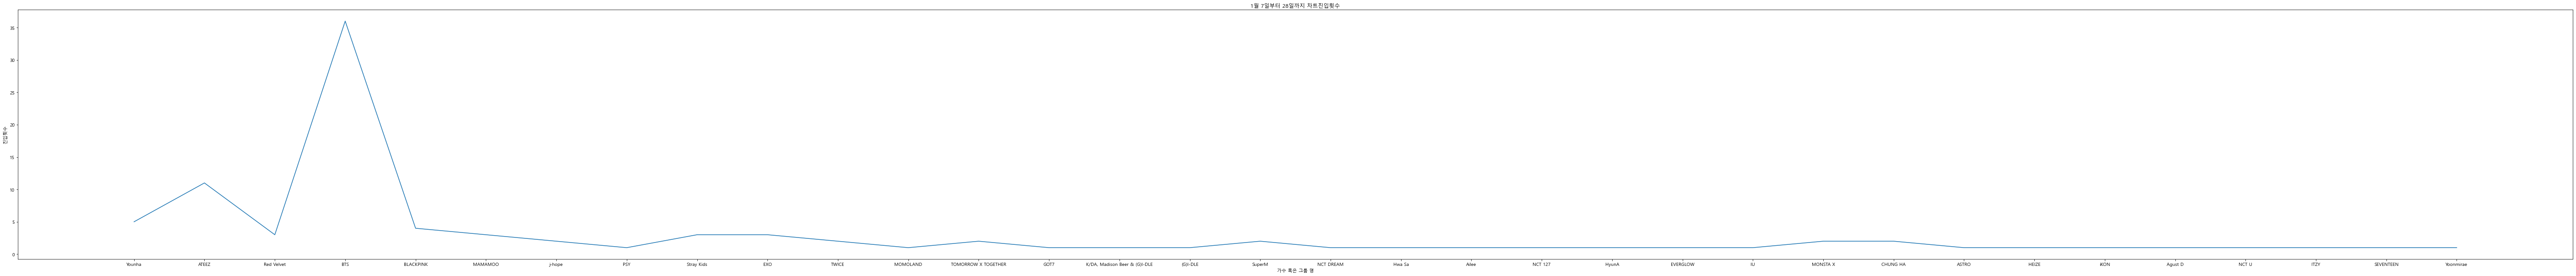

In [10]:
# 특정일자 조회
test_b=[]
test_b= list(dfus[dfus['Survey_Base_Date_DE'].dt.day == 
              int(input('일자를 입력해주세요(7일부터 28일까지입니다) : '))]['Music_NM'])

# 특정일자의 100위 안 차트 진입한 아티스트들의 100위 안 차트 진입 횟수
artist_count={}
for i in test_b:
    try: artist_count[i] += 1
    except: artist_count[i]=1

print(artist_count)

# 그래프 그리기
day_rate = artist_count.items()
x, y = zip(*day_rate)
plt.figure(figsize=(100, 10))                     
plt.plot(x, y)
plt.xlabel('가수 혹은 그룹 명')
plt.ylabel('진입횟수')
plt.title('1월 7일부터 28일까지 차트진입횟수')
plt.show()